In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load
df = pd.read_csv('emails.csv')

print("Missing Values:\n", df.isnull().sum())
df.dropna(inplace=True)

# Drop the Email No.
df = df.drop(columns=["Email No."])

# Split features and label
X = df.drop(columns=['Prediction'])
y = df['Prediction']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Missing Values:
 Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define base model
rf = RandomForestClassifier()

# Define grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Results
print("Best Parameters (Grid Search):", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, grid_search.predict(X_test)))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters (Grid Search): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       739
           1       0.97      0.97      0.97       296

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



In [4]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Randomized Search
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10)
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, scoring='f1', verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Results
print("Best Parameters (Random Search):", random_search.best_params_)
print("Classification Report:\n", classification_report(y_test, random_search.predict(X_test)))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters (Random Search): {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 142}
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       739
           1       0.96      0.97      0.97       296

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



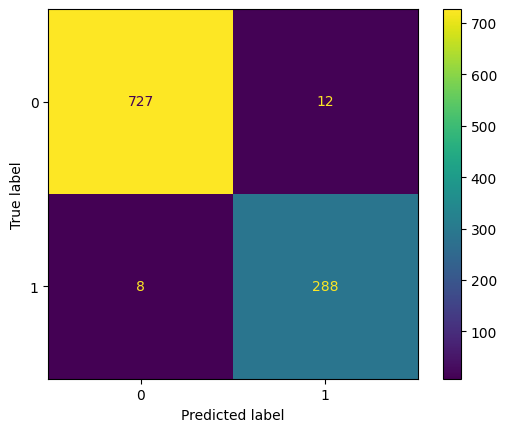

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = random_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()